In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\KIIT0001\Downloads\train.csv",usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X=df.drop(columns=['Survived'])
y=df['Survived']


In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [9]:
X_train['Age_imputed']=X_train['Age']
X_test['Age_imputed']=X_test['Age']

In [10]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [15]:
# TRAIN
mask_train = X_train['Age_imputed'].isnull()
n_train = mask_train.sum()

X_train.loc[mask_train, 'Age_imputed'] = (
    X_train['Age']
    .dropna()
    .sample(n_train, random_state=42)
    .values
)

# TEST
mask_test = X_test['Age_imputed'].isnull()
n_test = mask_test.sum()

X_test.loc[mask_test, 'Age_imputed'] = (
    X_train['Age']
    .dropna()
    .sample(n_test, random_state=42)
    .values
)


In [16]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([33.  , 51.  , 17.  , 54.  , 31.  , 34.  , 24.  , 26.  , 20.  ,
       30.  , 44.  , 70.5 , 18.  , 21.  , 41.  , 71.  , 29.  , 11.  ,
       22.  , 16.  , 40.  , 37.  , 24.  , 53.  , 39.  , 39.  , 34.  ,
       29.  , 26.  , 58.  ,  9.  , 47.  , 23.  , 21.  , 33.  , 24.  ,
       35.  , 16.  , 22.  , 24.  , 52.  , 16.  , 32.  , 27.  , 35.  ,
       44.  , 19.  , 33.  , 22.  , 39.  , 21.  , 32.  ,  2.  , 19.  ,
       20.  , 49.  , 29.  , 23.  , 36.  , 34.  , 32.  , 34.  , 31.  ,
       27.  , 30.5 , 29.  , 19.  , 40.  , 41.  , 16.  ,  2.  , 24.  ,
       30.  , 45.  , 26.  , 30.  ,  8.  , 50.  , 50.  , 45.  , 31.  ,
       22.  , 35.  , 42.  , 43.  ,  3.  , 26.  ,  4.  , 62.  , 22.  ,
       40.5 , 45.  , 28.  , 47.  , 30.  ,  2.  , 52.  ,  1.  , 35.  ,
       35.  , 25.  , 24.  , 35.  , 52.  , 22.  , 40.5 , 22.  , 47.  ,
       30.  , 38.  , 18.  , 48.  , 28.  , 18.  ,  0.67, 11.  , 24.  ,
       32.  , 26.  , 44.  , 40.  , 24.  , 23.  , 21.  , 12.  , 18.  ,
        9.  , 26.  ,

In [17]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

Series([], Name: Age_imputed, dtype: float64)

In [19]:

X_train.isnull().sum()

Age            148
Fare             0
Age_imputed      0
dtype: int64

In [20]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,54.0
493,71.0,49.5042,71.0
527,NaN,221.7792,29.0


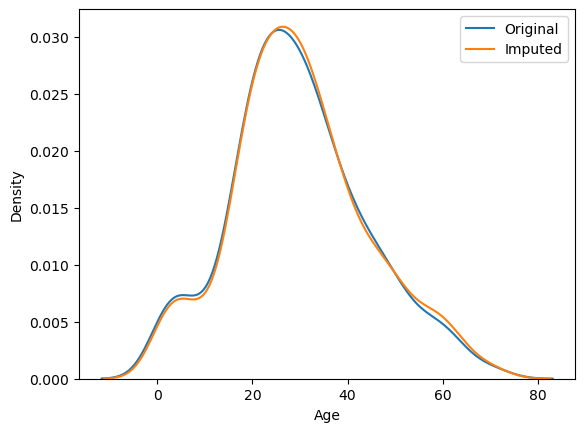

In [23]:
sns.kdeplot(X_train['Age'], label='Original')
sns.kdeplot(X_train['Age_imputed'], label='Imputed')

plt.legend()
plt.show()


In [24]:
print('Original variable variance',X_train['Age'].var())
print('variance after random variable',X_train['Age_imputed'].var())

Original variable variance 204.3495133904614
variance after random variable 206.18821302722873


In [26]:
X_train[['Age','Age_imputed']].cov()

,Age,Age_imputed
Age,204.349513,204.349513
Age_imputed,204.349513,206.188213


<Axes: >

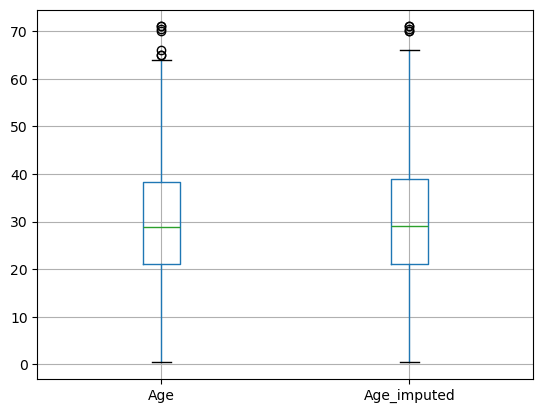

In [27]:
X_train[['Age','Age_imputed']].boxplot()

In [32]:
import numpy as np
import pandas as pd

# Example observation
observation = X_test.iloc[0]   # or any row

seed = int(observation['Fare']) if not pd.isna(observation['Fare']) else 42

sample_value = X_train['Age'].dropna().sample(1,random_state=seed)


In [35]:
data=pd.read_csv(r"C:\Users\KIIT0001\Downloads\train (1).csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [36]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [37]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [38]:
X=data
y=data['SalePrice']

In [39]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
X_train['GarageQual_imputed']=X_train['GarageQual']
X_test['GarageQual_imputed']=X_train['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [41]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
888,TA,TA,268000,TA,TA
736,NaN,TA,93500,TA,NaN
60,NaN,TA,158000,TA,NaN
619,Gd,TA,305000,TA,Gd
34,Gd,TA,277500,TA,Gd


In [43]:
# TRAIN
mask_train = X_train['GarageQual_imputed'].isnull()
n_train = mask_train.sum()

X_train.loc[mask_train, 'GarageQual_imputed'] = (
    X_train['GarageQual']
    .dropna()
    .sample(n_train, random_state=42)
    .values
)

# TEST
mask_test = X_test['GarageQual_imputed'].isnull()
n_test = mask_test.sum()

X_test.loc[mask_test, 'GarageQual_imputed'] = (
    X_train['GarageQual']
    .dropna()
    .sample(n_test, random_state=42)
    .values
)


In [44]:
# TRAIN
mask_train = X_train['FireplaceQu_imputed'].isnull()
n_train = mask_train.sum()

X_train.loc[mask_train, 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu']
    .dropna()
    .sample(n_train, random_state=42)
    .values
)

# TEST
mask_test = X_test['FireplaceQu_imputed'].isnull()
n_test = mask_test.sum()

X_test.loc[mask_test, 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu']
    .dropna()
    .sample(n_test, random_state=42)
    .values
)


In [45]:
temp=pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts()/len(X_train)
     ],
    axis=1)
temp.columns=['original','imputed']

In [46]:
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.038527
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [47]:
temp=pd.concat(
    [
        X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu'].value_counts()/len(df)
      
    ],axis=1)

temp.columns=['original','imputed']
temp

,original,imputed
FireplaceQu,,
Gd,0.494272,0.206849
TA,0.412439,0.172603
Fa,0.040917,0.017123
Po,0.027823,0.011644
Ex,0.024550,0.010274


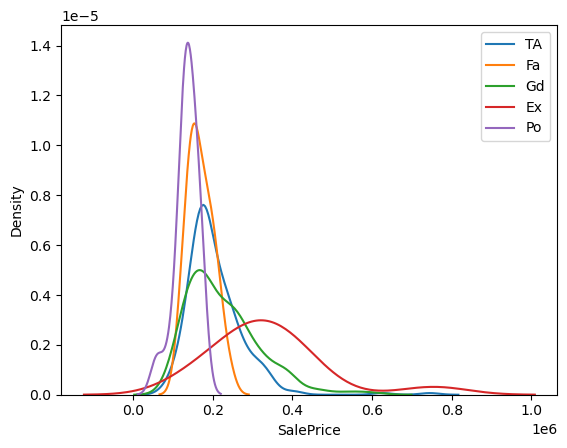

In [50]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(
        X_train[X_train['FireplaceQu'] == category]['SalePrice'],
        label=category
    )

plt.legend()
plt.show()
 

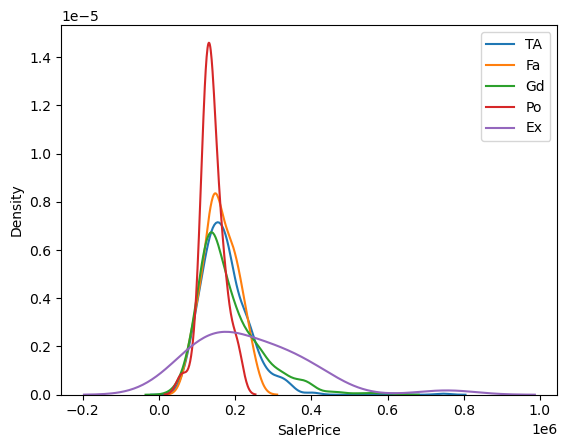

In [52]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(
        X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],
        label=category
    )

plt.legend()
plt.show()
